# Laboratorium 5: Morfologia obrazu

## 1. Teoria

### 1.1 Wprowadzenie

Morfologia matematyczna to zbiór operacji przetwarzania obrazów opartych na teorii zbiorów. Operacje morfologiczne analizują obraz poprzez dopasowanie do niego elementu strukturalnego o określonym kształcie i rozmiarze.

**Zastosowania:**
- Usuwanie szumu
- Ekstrakcja cech (krawędzie, szkielet)
- Segmentacja obiektów
- Analiza kształtu i topologii

### 1.2 Element strukturalny

Element strukturalny (SE, ang. *structuring element*) to niewielka macierz binarna definiująca sąsiedztwo piksela. Kształt SE determinuje charakter operacji morfologicznej.

**Przykłady elementów strukturalnych:**

```
Kwadrat 3×3:        Krzyż 3×3:         Koło 5×5:
┌───────┐           ┌───────┐            ┌───────────┐
│ 1 1 1 │           │ 0 1 0 │            │ 0 1 1 1 0 │
│ 1 1 1 │           │ 1 1 1 │            │ 1 1 1 1 1 │
│ 1 1 1 │           │ 0 1 0 │            │ 1 1 1 1 1 │
└───────┘           └───────┘            │ 1 1 1 1 1 │
                                         │ 0 1 1 1 0 │
                                         └───────────┘
```

### 1.3 Operacje podstawowe

#### Erozja

Erozja zmniejsza obiekty poprzez usuwanie pikseli z ich brzegów.

**Definicja:**
$$A \ominus B = \{z | B_z \subseteq A\}$$

gdzie $B_z$ to translacja elementu $B$ o wektor $z$.

**Działanie:**
- Piksel wyjściowy = 1 wtedy i tylko wtedy, gdy SE w całości mieści się w obiekcie
- Usuwa drobne szczegóły
- Zmniejsza rozmiar obiektów

**Przykład:**

```
Obraz wejściowy:    Element (3×3):     Wynik erozji:
┌───────────┐         ┌───────┐            ┌───────────┐
│ 0 0 0 0 0 │         │ 1 1 1 │            │ 0 0 0 0 0 │
│ 0 1 1 1 0 │         │ 1 1 1 │            │ 0 0 0 0 0 │
│ 0 1 1 1 0 │    ⊖   │ 1 1 1 │     =      │ 0 0 1 0 0 │
│ 0 1 1 1 0 │         └───────┘            │ 0 0 0 0 0 │
│ 0 0 0 0 0 │                              │ 0 0 0 0 0 │
└───────────┘                              └───────────┘
```

#### Dylatacja

Dylatacja powiększa obiekty poprzez dodawanie pikseli do ich brzegów.

**Definicja:**
$$A \oplus B = \{z | (\hat{B}_z \cap A) \neq \emptyset\}$$

gdzie $\hat{B}$ to odbicie elementu $B$.

**Działanie:**
- Piksel wyjściowy = 1 jeśli SE choć częściowo nakłada się na obiekt
- Wypełnia małe dziury
- Powiększa obiekty

**Przykład:**

```
Obraz wejściowy:    Element (3×3):     Wynik dylatacji:
┌───────────┐         ┌───────┐            ┌───────────┐
│ 0 0 0 0 0 │         │ 1 1 1 │            │ 0 1 1 1 0 │
│ 0 0 1 0 0 │         │ 1 1 1 │            │ 0 1 1 1 0 │
│ 0 0 0 0 0 │    ⊕   │ 1 1 1 │     =      │ 0 1 1 1 0 │
│ 0 0 0 0 0 │         └───────┘            │ 0 0 0 0 0 │
│ 0 0 0 0 0 │                              │ 0 0 0 0 0 │
└───────────┘                              └───────────┘
```

### 1.4 Operacje złożone

#### Otwarcie

Otwarcie = erozja + dylatacja. Usuwa drobne obiekty i wygładza kontury.

$$A \circ B = (A \ominus B) \oplus B$$

**Właściwości:**
- Usuwa szum punktowy
- Wygładza kontury
- Nie zmienia znacząco rozmiaru dużych obiektów

#### Zamknięcie

Zamknięcie = dylatacja + erozja. Wypełnia małe dziury i łączy bliskie obiekty.

$$A \bullet B = (A \oplus B) \ominus B$$

**Właściwości:**
- Wypełnia dziury
- Łączy bliskie obiekty
- Wygładza kontury od wewnątrz

**Porównanie:**

```
Obraz z szumem:     Po otwarciu:       Po zamknięciu:
┌───────────┐         ┌───────────┐        ┌───────────┐
│ 1 0 0 0 1 │         │ 0 0 0 0 0 │        │ 1 1 1 1 1 │
│ 0 1 1 1 0 │         │ 0 1 1 1 0 │        │ 1 1 1 1 1 │
│ 0 1 1 1 0 │         │ 0 1 1 1 0 │        │ 1 1 1 1 1 │
│ 0 1 1 1 0 │         │ 0 1 1 1 0 │        │ 1 1 1 1 1 │
│ 1 0 0 0 1 │         │ 0 0 0 0 0 │        │ 1 1 1 1 1 │
└───────────┘         └───────────┘        └───────────┘
```

### 1.5 Gradient morfologiczny

Gradient morfologiczny wydobywa krawędzie obiektów.

$$\text{grad}(A) = (A \oplus B) - (A \ominus B)$$

**Warianty:**
- **Gradient zewnętrzny:** $(A \oplus B) - A$
- **Gradient wewnętrzny:** $A - (A \ominus B)$

### 1.6 Morfologia w odcieniach szarości

Operacje morfologiczne można rozszerzyć na obrazy w skali szarości:

**Erozja:** $$(f \ominus b)(x,y) = \min_{(s,t) \in b} \{f(x+s, y+t) - b(s,t)\}$$

**Dylatacja:** $$(f \oplus b)(x,y) = \max_{(s,t) \in b} \{f(x+s, y+t) + b(s,t)\}$$

Dla płaskiego SE ($b(s,t) = 0$):
- Erozja → minimum lokalne
- Dylatacja → maksimum lokalne

### 1.7 Zastosowania praktyczne

**Usuwanie szumu:**
- Szum typu "sól i pieprz" → otwarcie + zamknięcie
- Drobne artefakty → otwarcie

**Poprawa segmentacji:**
- Rozdzielanie sklejonych obiektów → erozja
- Łączenie fragmentów → zamknięcie

**Ekstrakcja cech:**
- Krawędzie → gradient morfologiczny
- Szkielet → iteracyjne ścieśnianie

---


## 2. Kod startowy

### 2.1 Import bibliotek


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Konfiguracja wyświetlania
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['image.cmap'] = 'gray'


### 2.2 Funkcje pomocnicze


In [2]:
def rgb_to_gray(image):
    """
    Konwertuje obraz RGB do skali szarości.
    """
    if len(image.shape) == 3:
        return np.dot(image[...,:3], [0.299, 0.587, 0.114]).astype(np.uint8)
    return image

def show_images(images, titles=None, imgsize=5, cmap='gray'):
    """
    Wyświetla wiele obrazów obok siebie.
    """
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(imgsize*n, imgsize))
    if n == 1:
        axes = [axes]
    for i, (img, ax) in enumerate(zip(images, axes)):
        ax.imshow(img, cmap=cmap)
        ax.axis('off')
        if titles:
            ax.set_title(titles[i])
    plt.tight_layout()
    plt.show()


### 2.3 Wczytanie obrazów testowych


In [ ]:
from skimage import data
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray

# Obraz 1: Camera (klasyczny obraz testowy)
camera = data.camera()

# Obraz 2: Monety (segmentacja obiektów)
coins = data.coins()

# Obraz 3: Text (OCR, analiza dokumentów)
text_img = data.text()

# Obraz 4: Komórki biologiczne (mikroskopia)
cells_img = data.cell()

# Obraz 5: Syntetyczny z szumem punktowym
np.random.seed(42)
synthetic = np.zeros((200, 200), dtype=np.uint8)
cv2.rectangle(synthetic, (40, 50), (160, 150), 255, -1)
cv2.circle(synthetic, (60, 140), 20, 255, -1)
noise_mask = np.random.rand(200, 200) < 0.02
synthetic[noise_mask] = 255
noise_mask = np.random.rand(200, 200) < 0.02
synthetic[noise_mask & (synthetic == 255)] = 0

# Obraz 6: Syntetyczny z błędami progowania
synthetic2 = np.zeros((200, 200), dtype=np.uint8)
cv2.rectangle(synthetic2, (30, 30), (170, 170), 200, -1)
cv2.circle(synthetic2, (100, 100), 40, 150, -1)
_, synthetic2_bad = cv2.threshold(synthetic2, 180, 255, cv2.THRESH_BINARY)

# Progowanie obrazów
_, camera_bw = cv2.threshold(camera, 120, 255, cv2.THRESH_BINARY)
_, coins_bw = cv2.threshold(coins, 100, 255, cv2.THRESH_BINARY)
_, text_bw = cv2.threshold(text_img, 127, 255, cv2.THRESH_BINARY_INV)
_, cells_bw = cv2.threshold(cells_img, 100, 255, cv2.THRESH_BINARY)

print("Obrazy testowe wczytane z scikit-image:")
print(f"  camera: {camera.shape}")
print(f"  coins: {coins.shape}")
print(f"  text: {text_img.shape}")
print(f"  cells: {cells_img.shape}")
print(f"  synthetic (z szumem): {synthetic.shape}")
print(f"  synthetic2 (błędy progowania): {synthetic2_bad.shape}")


Obrazy testowe wczytane z scikit-image:
  camera: (512, 512)
  coins: (303, 384)
  text: (172, 448)
  cells: (660, 550)
  synthetic (z szumem): (200, 200)
  synthetic2 (błędy progowania): (200, 200)


### 2.4 Elementy strukturalne


In [4]:
# Definicja elementów strukturalnych
kernel_cross_3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
kernel_rect_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
kernel_rect_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel_ellipse_5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
kernel_ellipse_7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

print("Elementy strukturalne:")
print("\nKrzyż 3×3:")
print(kernel_cross_3)
print("\nKwadrat 3×3:")
print(kernel_rect_3)
print("\nKoło 5×5:")
print(kernel_ellipse_5)


Elementy strukturalne:

Krzyż 3×3:
[[0 1 0]
 [1 1 1]
 [0 1 0]]

Kwadrat 3×3:
[[1 1 1]
 [1 1 1]
 [1 1 1]]

Koło 5×5:
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


### 2.5 Wizualizacja obrazów testowych


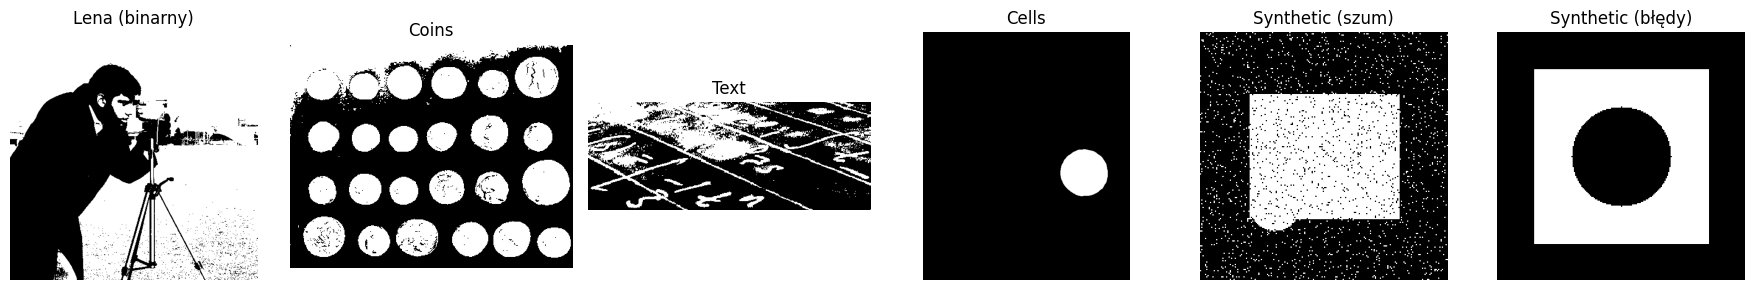

In [18]:
show_images([camera_bw, coins_bw, text_bw, cells_bw, synthetic, synthetic2_bad],
            ['Lena (binarny)', 'Coins', 'Text', 'Cells', 'Synthetic (szum)', 'Synthetic (błędy)'],
            imgsize=3)


## 3. Zadania do wykonania

### Zadanie 1: Erozja i dylatacja

Zaimplementuj podstawowe operacje morfologiczne.


In [ ]:
def erode_binary(img, kernel):
    """
    Erozja obrazu binarnego.

    Parametry:
    img (numpy.ndarray): Obraz binarny (0 lub 255)
    kernel (numpy.ndarray): Element strukturalny

    Zwraca:
    numpy.ndarray: Obraz po erozji
    """
    # TODO: zaimplementuj erozję używając cv2.erode
    pass

def dilate_binary(img, kernel):
    """
    Dylatacja obrazu binarnego.

    Parametry:
    img (numpy.ndarray): Obraz binarny (0 lub 255)
    kernel (numpy.ndarray): Element strukturalny

    Zwraca:
    numpy.ndarray: Obraz po dylatacji
    """
    # TODO: zaimplementuj dylatację używając cv2.dilate
    pass

# Test
eroded = cv2.erode(coins_bw, kernel_rect_3, iterations=1)
dilated = cv2.dilate(coins_bw, kernel_rect_3, iterations=1)
show_images([coins_bw, eroded, dilated], 
            ['Oryginał', 'Erozja', 'Dylatacja'], imgsize=4)


### Zadanie 2: Otwarcie i zamknięcie

Zaimplementuj operacje złożone.


In [ ]:
def opening(img, kernel):
    """
    Otwarcie morfologiczne (erozja → dylatacja).

    Parametry:
    img (numpy.ndarray): Obraz binarny
    kernel (numpy.ndarray): Element strukturalny

    Zwraca:
    numpy.ndarray: Obraz po otwarciu
    """
    # TODO: zastosuj erozję, a następnie dylatację
    pass

def closing(img, kernel):
    """
    Zamknięcie morfologiczne (dylatacja → erozja).

    Parametry:
    img (numpy.ndarray): Obraz binarny
    kernel (numpy.ndarray): Element strukturalny

    Zwraca:
    numpy.ndarray: Obraz po zamknięciu
    """
    # TODO: zastosuj dylatację, a następnie erozję
    pass

# Test
opened = cv2.morphologyEx(synthetic, cv2.MORPH_OPEN, kernel_rect_5)
closed = cv2.morphologyEx(synthetic, cv2.MORPH_CLOSE, kernel_rect_5)
show_images([synthetic, opened, closed], 
            ['Oryginał (szum)', 'Otwarcie', 'Zamknięcie'], imgsize=4)


### Zadanie 3: Gradient morfologiczny

Zaimplementuj gradient morfologiczny do detekcji krawędzi.


In [ ]:
def morphological_gradient(img, kernel):
    """
    Gradient morfologiczny: dylatacja - erozja.

    Parametry:
    img (numpy.ndarray): Obraz binarny
    kernel (numpy.ndarray): Element strukturalny

    Zwraca:
    numpy.ndarray: Gradient morfologiczny
    """
    # TODO: oblicz różnicę między dylatacją a erozją
    pass

# Test
gradient = cv2.morphologyEx(coins_bw, cv2.MORPH_GRADIENT, kernel_ellipse_5)
show_images([coins_bw, gradient], 
            ['Oryginał', 'Gradient morfologiczny'], imgsize=5)


### Zadanie 4: Morfologia dla obrazów w odcieniach szarości

Rozszerz operacje na obrazy grayscale.


In [ ]:
def erode_gray(img, kernel):
    """
    Erozja obrazu w odcieniach szarości.
    """
    # TODO: użyj cv2.erode
    pass

def dilate_gray(img, kernel):
    """
    Dylatacja obrazu w odcieniach szarości.
    """
    # TODO: użyj cv2.dilate
    pass

# Test
eroded_gray = cv2.erode(camera, kernel_ellipse_5)
dilated_gray = cv2.dilate(camera, kernel_ellipse_5)
show_images([camera, eroded_gray, dilated_gray], 
            ['Oryginał', 'Erozja (gray)', 'Dylatacja (gray)'], imgsize=4)


Test morfologii w skali szarości:
Erozja gray - różnica: 0
Dylatacja gray - różnica: 0


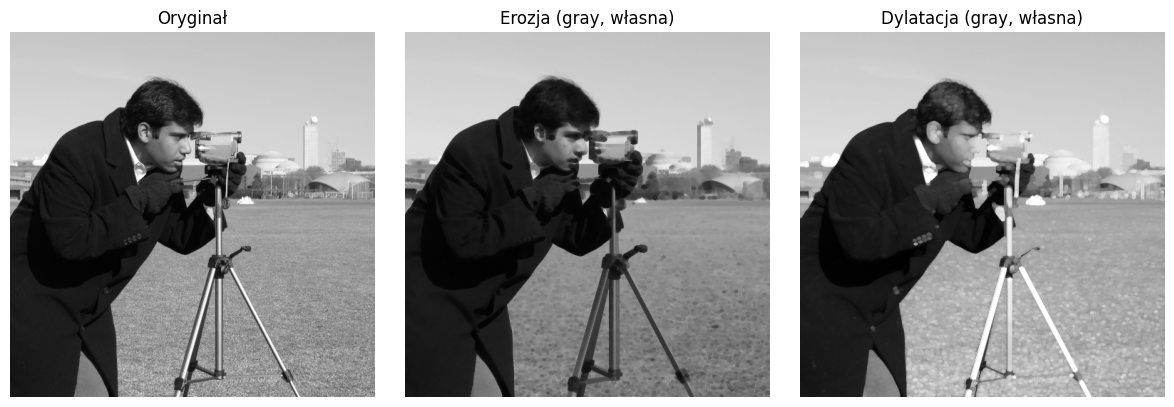

In [9]:
def erode_gray(img, kernel):
    """
    Erozja obrazu w odcieniach szarości - implementacja własna.

    Algorytm:
    Dla każdego piksela bierzemy minimum z regionu pokrytego kernelem.
    """
    # Rozmiary
    img_h, img_w = img.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    # Padding
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')

    # Obraz wynikowy
    result = np.zeros_like(img)

    # Dla każdego piksela
    for i in range(img_h):
        for j in range(img_w):
            # Wyciągnij region
            region = padded[i:i+k_h, j:j+k_w]

            # Erozja w skali szarości = minimum lokalne
            # Uwzględniamy tylko piksele, gdzie kernel == 1
            masked_region = region[kernel == 1]
            if len(masked_region) > 0:
                result[i, j] = np.min(masked_region)
            else:
                result[i, j] = img[i, j]

    return result

def dilate_gray(img, kernel):
    """
    Dylatacja obrazu w odcieniach szarości - implementacja własna.

    Algorytm:
    Dla każdego piksela bierzemy maksimum z regionu pokrytego kernelem.
    """
    # Rozmiary
    img_h, img_w = img.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    # Padding
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')

    # Obraz wynikowy
    result = np.zeros_like(img)

    # Dla każdego piksela
    for i in range(img_h):
        for j in range(img_w):
            # Wyciągnij region
            region = padded[i:i+k_h, j:j+k_w]

            # Dylatacja w skali szarości = maksimum lokalne
            # Uwzględniamy tylko piksele, gdzie kernel == 1
            masked_region = region[kernel == 1]
            if len(masked_region) > 0:
                result[i, j] = np.max(masked_region)
            else:
                result[i, j] = img[i, j]

    return result

# Test
print("Test morfologii w skali szarości:")
eroded_gray = erode_gray(camera, kernel_ellipse_5)
dilated_gray = dilate_gray(camera, kernel_ellipse_5)

# Porównanie z cv2
eroded_cv2 = cv2.erode(camera, kernel_ellipse_5, iterations=1)
dilated_cv2 = cv2.dilate(camera, kernel_ellipse_5, iterations=1)
print(f"Erozja gray - różnica: {np.sum(np.abs(eroded_gray.astype(int) - eroded_cv2.astype(int)))}")
print(f"Dylatacja gray - różnica: {np.sum(np.abs(dilated_gray.astype(int) - dilated_cv2.astype(int)))}")

show_images([camera, eroded_gray, dilated_gray], 
    ['Oryginał', 'Erozja (gray, własna)', 'Dylatacja (gray, własna)'], imgsize=4)


### Zadanie 5: Usuwanie szumu i poprawa segmentacji

Zastosuj morfologię do praktycznych problemów.


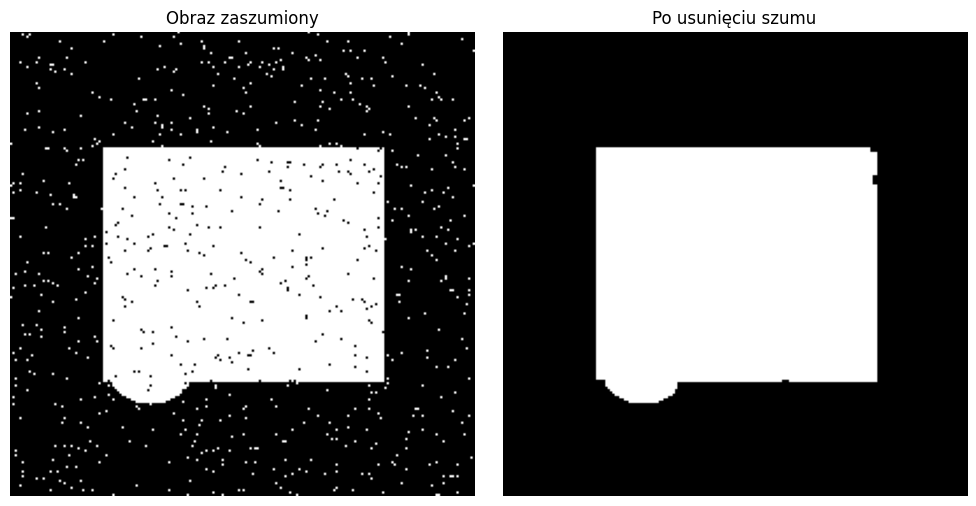

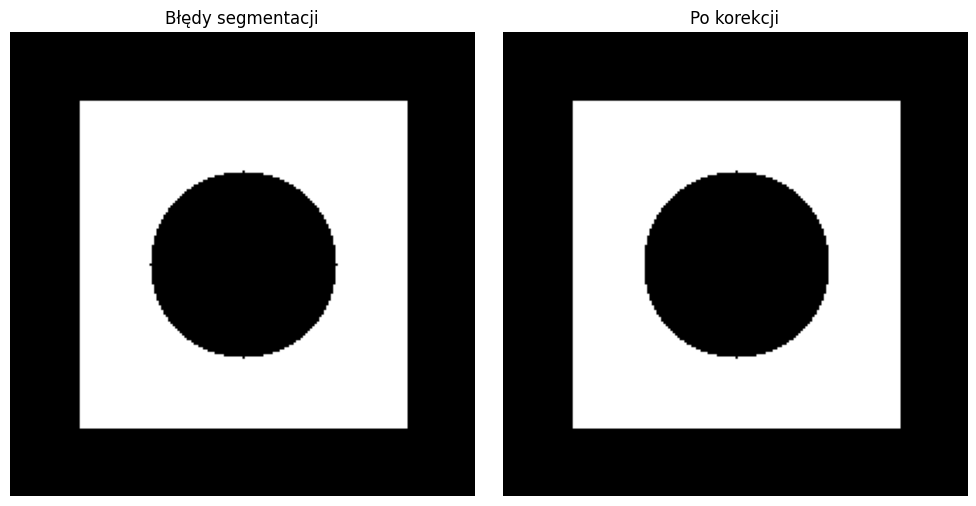

In [10]:
# Usuwanie szumu punktowego
denoised = cv2.morphologyEx(synthetic, cv2.MORPH_OPEN, kernel_rect_3)
denoised = cv2.morphologyEx(denoised, cv2.MORPH_CLOSE, kernel_rect_3)

show_images([synthetic, denoised], 
            ['Obraz zaszumiony', 'Po usunięciu szumu'], imgsize=5)

# Poprawa błędów segmentacji
fixed = cv2.morphologyEx(synthetic2_bad, cv2.MORPH_CLOSE, kernel_ellipse_7)
fixed = cv2.morphologyEx(fixed, cv2.MORPH_OPEN, kernel_rect_3)

show_images([synthetic2_bad, fixed], 
            ['Błędy segmentacji', 'Po korekcji'], imgsize=5)


### Zadanie 6 (zaawansowane): Rekonstrukcja morfologiczna

Implementacja rekonstrukcji przez iteracyjne dylatacje.



Test rekonstrukcji morfologicznej:
Rekonstrukcja zakończona po 27 iteracjach


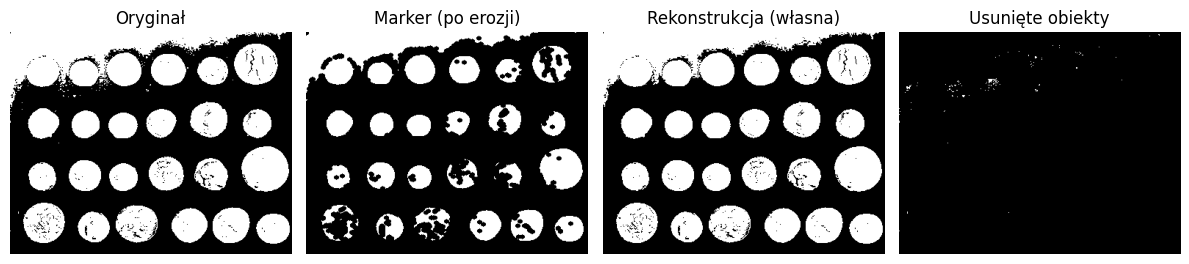

In [11]:
def morphological_reconstruction(marker, mask, kernel):
    """
    Rekonstrukcja morfologiczna przez dylatację - implementacja własna.

    Parametry:
    marker (numpy.ndarray): Obraz markera (punkt startowy)
    mask (numpy.ndarray): Obraz maski (ograniczenie)
    kernel (numpy.ndarray): Element strukturalny

    Zwraca:
    numpy.ndarray: Obraz zrekonstruowany

    Algorytm:
    1. Zaczynamy od markera
    2. Iteracyjnie dylatujemy marker
    3. Po każdej dylatacji ograniczamy wynik do maski (minimum)
    4. Powtarzamy, aż nie ma zmian
    """
    reconstructed = marker.copy()

    iteration = 0
    while True:
        iteration += 1

        # Dylatacja markera (używamy własnej funkcji)
        dilated = dilate_binary(reconstructed, kernel)

        # Ograniczenie do maski (minimum z maską)
        reconstructed_new = np.minimum(dilated, mask)

        # Sprawdź, czy są zmiany
        if np.array_equal(reconstructed, reconstructed_new):
            print(f"Rekonstrukcja zakończona po {iteration} iteracjach")
            break

        reconstructed = reconstructed_new

        # Zabezpieczenie przed nieskończoną pętlą
        if iteration > 1000:
            print("Osiągnięto limit iteracji (1000)")
            break

    return reconstructed

# Test - przykład usuwania małych obiektów
print("\nTest rekonstrukcji morfologicznej:")

# Tworzymy marker przez erozję (usuwa małe obiekty)
marker = cv2.erode(coins_bw, kernel_ellipse_7, iterations=1)

# Rekonstrukcja z oryginalnym obrazem jako maską
# Przywraca duże obiekty do oryginalnego rozmiaru
reconstructed = morphological_reconstruction(marker, coins_bw, kernel_rect_3)

# Różnica pokazuje usunięte małe obiekty
removed = cv2.subtract(coins_bw, reconstructed)

show_images([coins_bw, marker, reconstructed, removed], 
    ['Oryginał', 'Marker (po erozji)', 'Rekonstrukcja (własna)', 'Usunięte obiekty'], imgsize=3)


## 4. Przykłady użycia

### 4.1 Usuwanie szumu punktowego


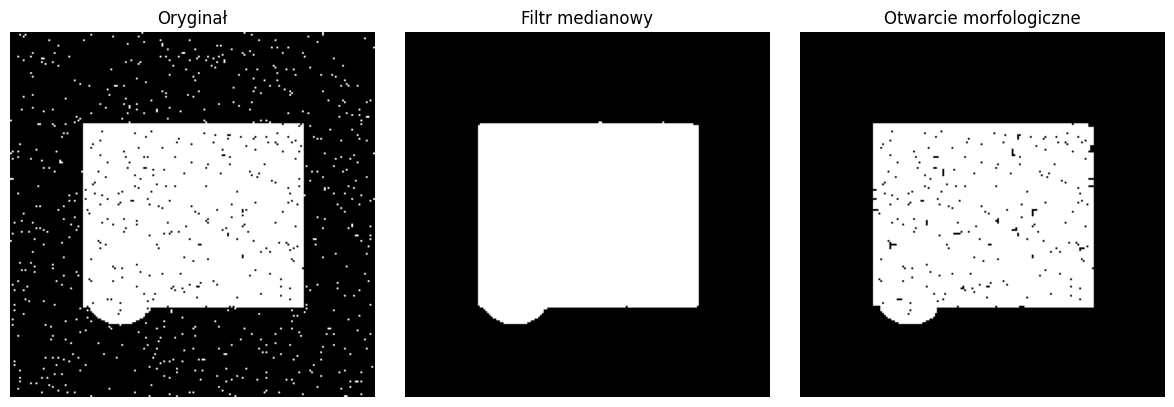

In [12]:
# Porównanie z filtrem medianowym (Lab 03)
median_filtered = cv2.medianBlur(synthetic, 3)
morph_filtered = cv2.morphologyEx(synthetic, cv2.MORPH_OPEN, kernel_rect_3)

show_images([synthetic, median_filtered, morph_filtered],
            ['Oryginał', 'Filtr medianowy', 'Otwarcie morfologiczne'], imgsize=4)


### 4.2 Segmentacja monet


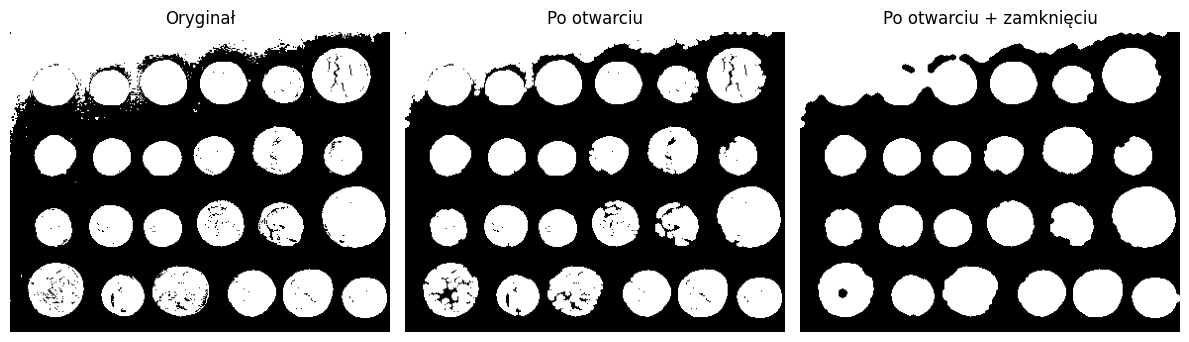

In [13]:
# Poprawa segmentacji monet
coins_opened = cv2.morphologyEx(coins_bw, cv2.MORPH_OPEN, kernel_ellipse_5)
coins_closed = cv2.morphologyEx(coins_opened, cv2.MORPH_CLOSE, kernel_ellipse_7)

show_images([coins_bw, coins_opened, coins_closed],
            ['Oryginał', 'Po otwarciu', 'Po otwarciu + zamknięciu'], imgsize=4)


### 4.3 Porównanie gradientu morfologicznego z Sobelem


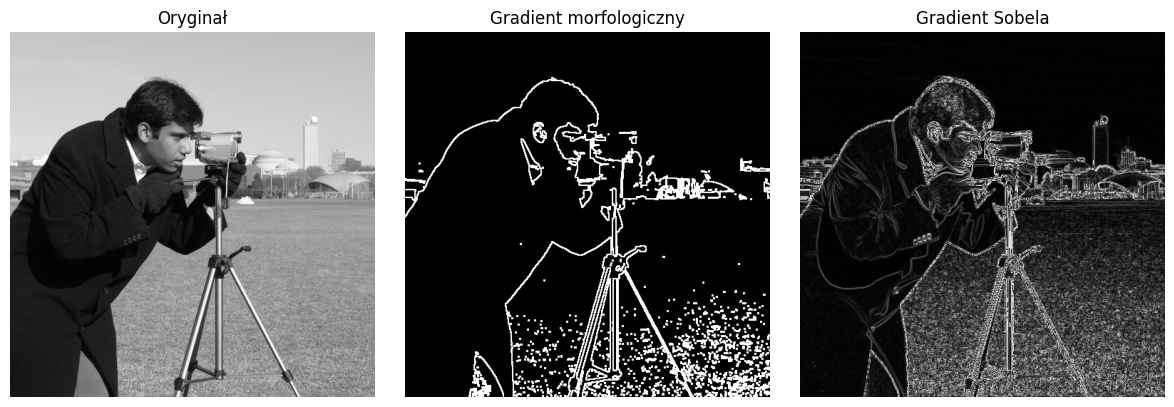

In [14]:
# Gradient morfologiczny
morph_grad = cv2.morphologyEx(camera_bw, cv2.MORPH_GRADIENT, kernel_rect_3)

# Sobel (Lab 03)
sobel_x = cv2.Sobel(camera, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(camera, cv2.CV_64F, 0, 1, ksize=3)
sobel_grad = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)

show_images([camera, morph_grad, sobel_grad],
            ['Oryginał', 'Gradient morfologiczny', 'Gradient Sobela'], imgsize=4)


### 4.4 Ekstrakcja tekstu


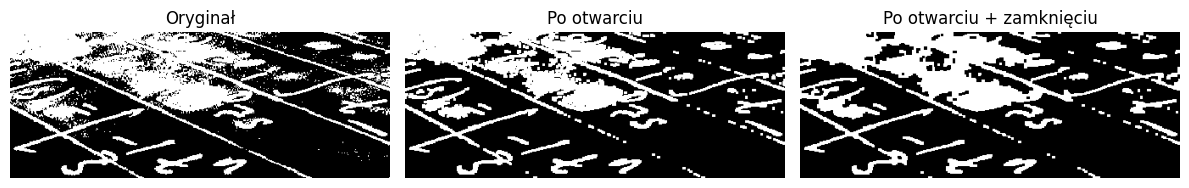

In [15]:
# Poprawa jakości tekstu
text_opened = cv2.morphologyEx(text_bw, cv2.MORPH_OPEN, kernel_rect_3)
text_closed = cv2.morphologyEx(text_opened, cv2.MORPH_CLOSE, kernel_rect_3)

show_images([text_bw, text_opened, text_closed],
            ['Oryginał', 'Po otwarciu', 'Po otwarciu + zamknięciu'], imgsize=4)


### 4.5 Analiza komórek biologicznych


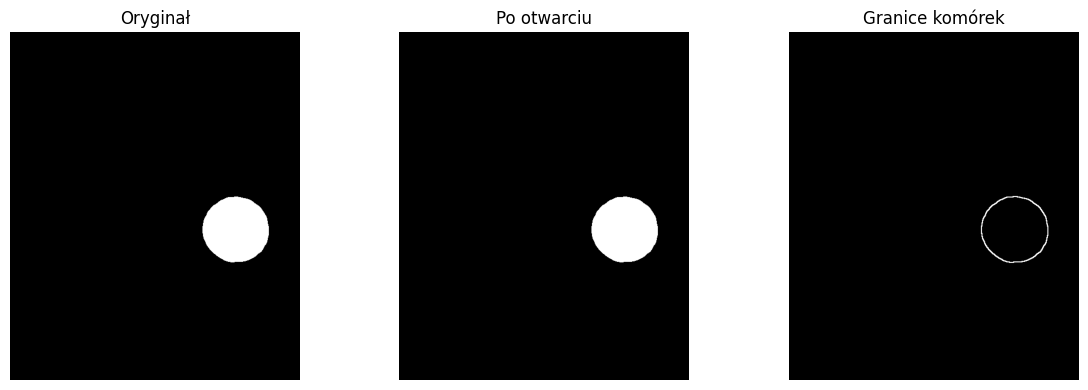

In [16]:
# Separacja komórek
cells_opened = cv2.morphologyEx(cells_bw, cv2.MORPH_OPEN, kernel_ellipse_5)
cells_gradient = cv2.morphologyEx(cells_opened, cv2.MORPH_GRADIENT, kernel_rect_3)

show_images([cells_bw, cells_opened, cells_gradient],
            ['Oryginał', 'Po otwarciu', 'Granice komórek'], imgsize=4)


---

## Podsumowanie

W tym laboratorium poznaliśmy:
- Podstawowe operacje morfologiczne (erozja, dylatacja)
- Operacje złożone (otwarcie, zamknięcie)
- Gradient morfologiczny
- Morfologię w odcieniach szarości
- Praktyczne zastosowania: usuwanie szumu, poprawa segmentacji, ekstrakcja cech

**Kluczowe wnioski:**
- Wybór elementu strukturalnego ma kluczowe znaczenie
- Otwarcie usuwa szum, zamknięcie wypełnia dziury
- Morfologia jest szybsza niż filtry konwolucyjne dla operacji binarnych
- Gradient morfologiczny to alternatywa dla Sobela/Prewitta
